In [1]:
from neuralNet import MatrixNeuralNet
from pdes import LinearQuadraticRegulator2D
import matplotlib.pyplot as plt
import numpy as np
import torch
from utils import setLogger

setLogger("training")

In [18]:
layers = [2, 20, 20, 3]
network = MatrixNeuralNet( layers)
print( network.model )
gamma = {'data': 0, 'gradient': 0, 'residual': 1}
pde = LinearQuadraticRegulator2D( network, gamma )

lrs = [1e-2, 1e-3]
iterations = [1000, 2000]

resu = pde.train(
    interiorPointCount=10,
    dataPointCount=10,
    lrs=lrs,
    iterations=iterations,
    sampling='random'
    )

Sequential(
  (0): Linear(in_features=2, out_features=20, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=20, out_features=20, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=20, out_features=3, bias=True)
)
2024-08-04 18:27:34,076 - training - INFO - 0 / 3000 (0 / 1000), lr:1.0e-02, loss:1.42e+01 (data: 0.00e+00, grad: 0.00e+00, res: 1.42e+01)


2024-08-04 18:27:37,599 - training - INFO - 1000 / 3000 (0 / 2000), lr:1.0e-03, loss:2.51e-06 (data: 0.00e+00, grad: 0.00e+00, res: 2.51e-06)
2024-08-04 18:27:40,869 - training - INFO - 2000 / 3000 (1000 / 2000), lr:1.0e-03, loss:1.36e-05 (data: 0.00e+00, grad: 0.00e+00, res: 1.36e-05)


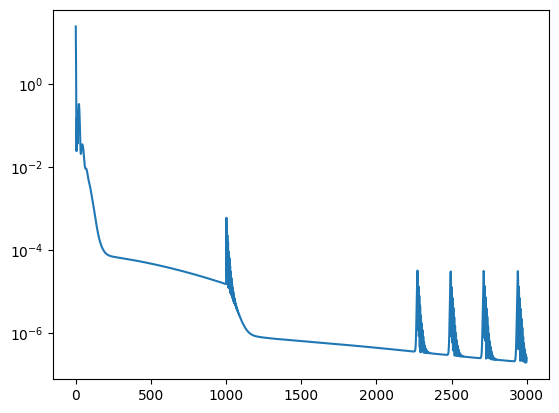

In [14]:
ax = resu['loss'].plot()
ax.set_yscale("log")

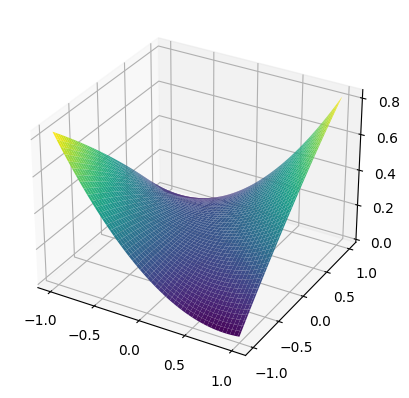

In [15]:
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)

X, Y = np.meshgrid(x, y)
space = pde.getEvaluationPoints() 

Z = pde.network.computeValueFunction(space).reshape(-1, 100) - pde.network.computeValueFunction(space).reshape(-1, 100).min()

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z.detach().cpu().numpy(), cmap='viridis');

# Convex network

In [1]:
from neuralNet import ConvexNeuralNet
from icnn import get_model
from neuralNet import MatrixNeuralNet
from pdes import LinearQuadraticRegulator2D
import matplotlib.pyplot as plt
import numpy as np
import torch
from utils import setLogger

setLogger("training")

In [2]:
# Sequential(
#   (0): Linear(in_features=2, out_features=20, bias=True)
#   (1): Sigmoid()
#   (2): Linear(in_features=20, out_features=20, bias=True)
#   (3): Sigmoid()
#   (4): Linear(in_features=20, out_features=3, bias=True)
# )

In [21]:
layers = [2, 20, 20, 1]
convexModel = get_model("icnn", num_hidden=32, bad_init=True)
network = ConvexNeuralNet( layers, convexModel)
gamma = {'data': 0, 'gradient': 0, 'residual': 1}
pde = LinearQuadraticRegulator2D( network, gamma )

print(network.model)

lrs = [1e-3, 1e-4, 1e-5]
iterations = [1000, 2000, 3000]

resu = pde.train(
    interiorPointCount=10,
    dataPointCount=10,
    lrs=lrs,
    iterations=iterations,
    sampling='grid'
    )

Sequential(
  (0): Linear(in_features=2, out_features=32, bias=True)
  (1): ELU(alpha=1.0)
  (2): ConvexLinear(in_features=32, out_features=32, bias=True)
  (3): ELU(alpha=1.0)
  (4): ConvexLinear(in_features=32, out_features=1, bias=True)
)
2024-08-04 21:50:30,184 - training - INFO - 0 / 6000 (0 / 1000), lr:1.0e-03, loss:8.85e-02 (data: 0.00e+00, grad: 0.00e+00, res: 8.85e-02)
2024-08-04 21:50:31,531 - training - INFO - 1000 / 6000 (0 / 2000), lr:1.0e-04, loss:3.86e-05 (data: 0.00e+00, grad: 0.00e+00, res: 3.86e-05)
2024-08-04 21:50:32,901 - training - INFO - 2000 / 6000 (1000 / 2000), lr:1.0e-04, loss:2.16e-05 (data: 0.00e+00, grad: 0.00e+00, res: 2.16e-05)
2024-08-04 21:50:34,233 - training - INFO - 3000 / 6000 (0 / 3000), lr:1.0e-05, loss:1.27e-05 (data: 0.00e+00, grad: 0.00e+00, res: 1.27e-05)
2024-08-04 21:50:35,578 - training - INFO - 4000 / 6000 (1000 / 3000), lr:1.0e-05, loss:1.07e-05 (data: 0.00e+00, grad: 0.00e+00, res: 1.07e-05)
2024-08-04 21:50:36,929 - training - INFO - 5

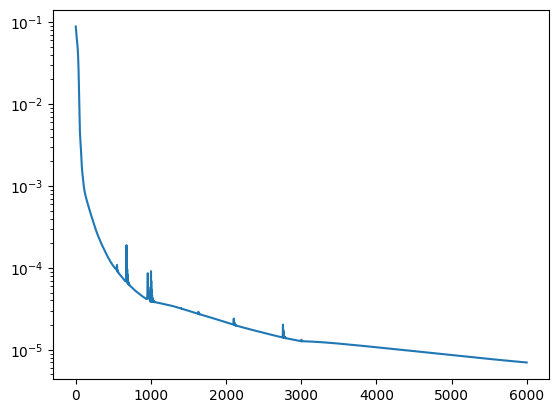

In [22]:
ax = resu['loss'].plot()
ax.set_yscale("log")

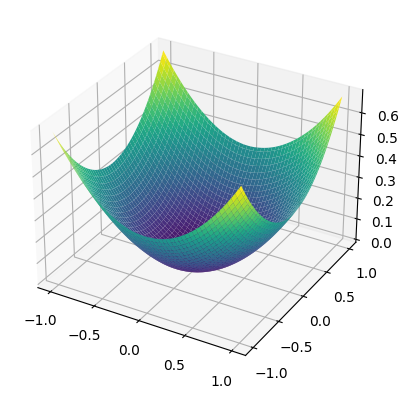

In [23]:
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)

X, Y = np.meshgrid(x, y)
space = pde.getEvaluationPoints() 

Z = pde.network.computeValueFunction(space).reshape(-1, 100) - pde.network.computeValueFunction(space).reshape(-1, 100).min()

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z.detach().cpu().numpy(), cmap='viridis');